# **Customer Relationship Management (CRM) System for Agribusiness**

## **Database Schema**

The database **InvoiceDB** schema consists of five tables:

1. **Suppliers Table**
   - Holds information about suppliers, including their address, tax-related details, and bank account information.
   - `supplier_id` is the primary key.

2. **Buyers Table**
   - Stores information about buyers, including their address and tax details.
   - `buyer_id` is the primary key.

3. **Invoices Table**
   - Records invoice details, linking them to specific suppliers and buyers.
   - `invoice_id` is the primary key.
   - `supplier_id` and `buyer_id` are foreign keys that reference the `Suppliers` and `Buyers` tables, respectively.

4. **Invoice_Items Table**
   - Contains individual items listed on each invoice.
   - `invoice_item_id` is the primary key.
   - `invoice_id` is a foreign key referencing the `Invoices` table.

5. **Additional_Charges Table**
   - Captures any extra charges applied to an invoice (e.g., shipping, handling fees).
   - `charge_id` is the primary key.
   - `invoice_id` is a foreign key referencing the `Invoices` table.


## **Entity Relationship Diagram (ERD)**

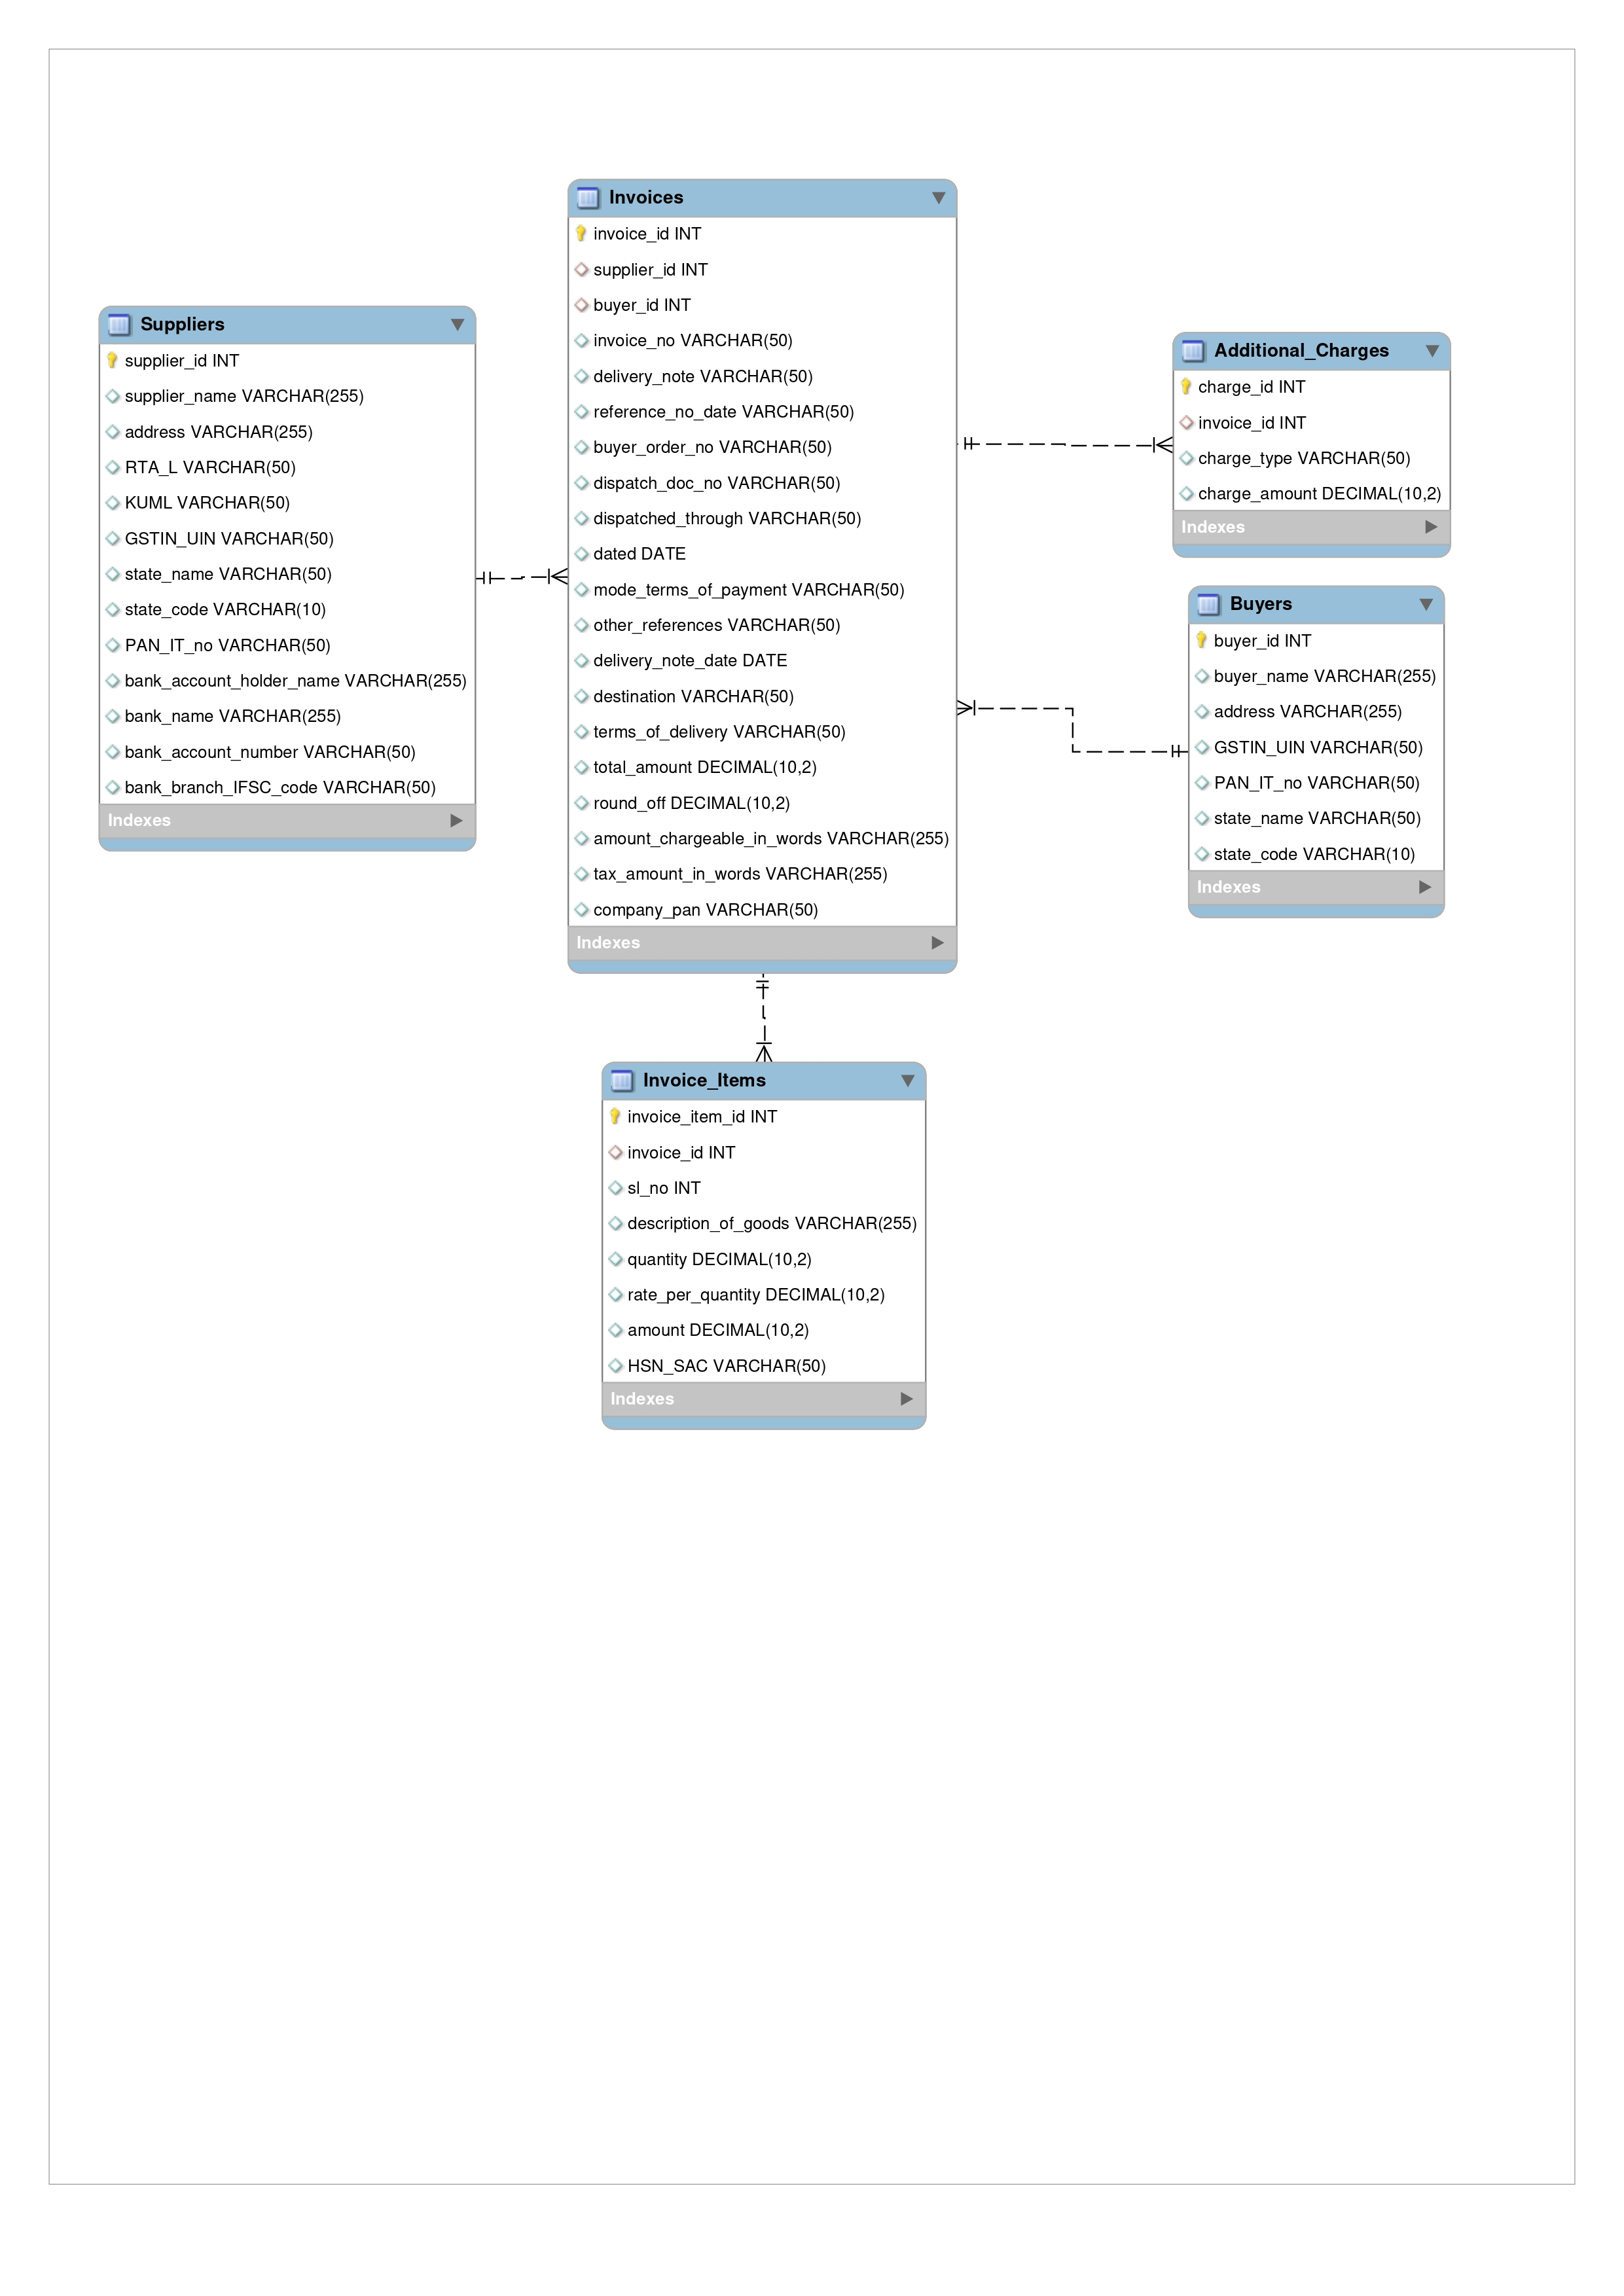








## **Relationships**

**1. Suppliers and Invoices**
*   **Relationship Type:** One-to-Many
*   One supplier can be associated with multiple invoices, but each invoice is linked to only one supplier.


**2. Buyers and Invoices**
*   **Relationship Type:** One-to-Many
*   One buyer can have multiple invoices, but each invoice pertains to a single buyer.


**3. Invoices and Invoice_Items**
*   **Relationship Type:** One-to-Many
*   One invoice can contain multiple invoice items, but each invoice item belongs to only one invoice.


**4. Invoices and Additional_Charges**
*   **Relationship Type:** One-to-Many
*   One invoice might have several additional charges associated with it, but each additional charge is linked to a specific invoice.



## **Database Creation**

* Create the database
```sql
CREATE DATABASE InvoiceDB;
USE InvoiceDB;
```

* Create the Suppliers table
```sql
CREATE TABLE Suppliers (
    supplier_id INT AUTO_INCREMENT PRIMARY KEY,
    supplier_name VARCHAR(255),
    address VARCHAR(255),
    RTA_L VARCHAR(50),
    KUML VARCHAR(50),
    GSTIN_UIN VARCHAR(50),
    state_name VARCHAR(50),
    state_code VARCHAR(10),
    PAN_IT_no VARCHAR(50),
    bank_account_holder_name VARCHAR(255),
    bank_name VARCHAR(255),
    bank_account_number VARCHAR(50),
    bank_branch_IFSC_code VARCHAR(50)
);
```

* Create the Buyers table
```sql
CREATE TABLE Buyers (
    buyer_id INT AUTO_INCREMENT PRIMARY KEY,
    buyer_name VARCHAR(255),
    address VARCHAR(255),
    GSTIN_UIN VARCHAR(50),
    PAN_IT_no VARCHAR(50),
    state_name VARCHAR(50),
    state_code VARCHAR(10)
);
```

* Create the Invoices table
```sql
CREATE TABLE Invoices (
    invoice_id INT AUTO_INCREMENT PRIMARY KEY,
    supplier_id INT,
    buyer_id INT,
    invoice_no VARCHAR(50),
    delivery_note VARCHAR(50),
    reference_no_date VARCHAR(50),
    buyer_order_no VARCHAR(50),
    dispatch_doc_no VARCHAR(50),
    dispatched_through VARCHAR(50),
    dated DATE,
    mode_terms_of_payment VARCHAR(50),
    other_references VARCHAR(50),
    delivery_note_date DATE,
    destination VARCHAR(50),
    terms_of_delivery VARCHAR(50),
    total_amount DECIMAL(10,2),
    round_off DECIMAL(10,2),
    amount_chargeable_in_words VARCHAR(255),
    tax_amount_in_words VARCHAR(255),
    company_pan VARCHAR(50),
    FOREIGN KEY (supplier_id) REFERENCES Suppliers(supplier_id),
    FOREIGN KEY (buyer_id) REFERENCES Buyers(buyer_id)
);
```

* Create the Invoice_Items table
```sql
CREATE TABLE Invoice_Items (
    invoice_item_id INT AUTO_INCREMENT PRIMARY KEY,
    invoice_id INT,
    sl_no INT,
    description_of_goods VARCHAR(255),
    quantity DECIMAL(10,2),
    rate_per_quantity DECIMAL(10,2),
    amount DECIMAL(10,2),
    HSN_SAC VARCHAR(50),
    FOREIGN KEY (invoice_id) REFERENCES Invoices(invoice_id)
);
```


* Create the Additional_Charges table
```sql
CREATE TABLE Additional_Charges (
    charge_id INT AUTO_INCREMENT PRIMARY KEY,
    invoice_id INT,
    charge_type VARCHAR(50),
    charge_amount DECIMAL(10,2),
    FOREIGN KEY (invoice_id) REFERENCES Invoices(invoice_id)
);
```



## **User Creation and Privilege Assignment**

1. **Admin User**
   - **User**: `admin_user`
   - **Password**: `admin_password`
   - **Privileges**: All privileges on the `InvoiceDB` database, meaning full control including creating, reading, updating, deleting, and managing the database and its objects.
     ```sql
     CREATE USER 'admin_user'@'localhost' IDENTIFIED BY 'admin_password';
     GRANT ALL PRIVILEGES ON InvoiceDB.* TO 'admin_user'@'localhost';
     FLUSH PRIVILEGES;
     ```

2. **Read-Only User**
   - **User**: `read_user`
   - **Password**: `read_password`
   - **Privileges**: Only `SELECT` (read) access on the `InvoiceDB` database, meaning the user can view data but cannot modify it.
     ```sql
     CREATE USER 'read_user'@'localhost' IDENTIFIED BY 'read_password';
     GRANT SELECT ON InvoiceDB.* TO 'read_user'@'localhost';
     FLUSH PRIVILEGES;
     ```

3. **Data Entry User**
   - **User**: `data_entry_user`
   - **Password**: `data_entry_password`
   - **Privileges**: `INSERT` and `UPDATE` privileges on the `InvoiceDB` database, allowing the user to add and modify data but not delete it.
     ```sql
     CREATE USER 'data_entry_user'@'localhost' IDENTIFIED BY 'data_entry_password';
     GRANT INSERT, UPDATE ON InvoiceDB.* TO 'data_entry_user'@'localhost';
     FLUSH PRIVILEGES;
     ```

4. **Audit User**
   - **User**: `audit_user`
   - **Password**: `audit_password`
   - **Privileges**:
     - `SELECT` on all tables, allowing the user to view data.
     - `DELETE` on the `Invoices` and `Invoice_Items` tables, allowing the user to delete specific records from these tables, which is useful for auditing purposes.
     ```sql
     CREATE USER 'audit_user'@'localhost' IDENTIFIED BY 'audit_password';
     GRANT SELECT, DELETE ON InvoiceDB.Invoices TO 'audit_user'@'localhost';
     GRANT SELECT, DELETE ON InvoiceDB.Invoice_Items TO 'audit_user'@'localhost';
     GRANT SELECT ON InvoiceDB.Suppliers TO 'audit_user'@'localhost';
     GRANT SELECT ON InvoiceDB.Buyers TO 'audit_user'@'localhost';
     GRANT SELECT ON InvoiceDB.Additional_Charges TO 'audit_user'@'localhost';
     FLUSH PRIVILEGES;
     ```




